    Bachelor Thesis 2017 - Coffee - Climat - Soils data analysis
    
    HEIG-VD - University of Applied Sciences of Western Switzerland
    Route de Cheseaux 1, 1400 Yverdon-les-Bains, Switzerland
    
    International Center for Tropical Agriculture (CIAT)
    Headquarters and Regional Office for Latin America and the Caribbean, 
    Km 17 Recta Cali-Palmira │C.P. 763537 │ A.A. 6713  Cali, Colombia

    
    Student: Thibault Schowing
    Teacher: Carlos Andrés Peña
    
     




# SOM avec Python

Les packages de SOM (Self Organising Map) de Python sont incomplets et ne permettent par exemple pas, dans ce qui est connu, d'extraire les *components* ou variables de la map. R sera donc plutôt utilisé pour réaliser les SOMs. Cependant il est tout de même intéressant de tester avec les packages disponibles. 



In [1]:
import os
print os.getcwd() 

import sys
print sys.path
sys.path.append('C:/Python27/Lib')
sys.path.append('C:/Python27/Lib/site-packages')

import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

C:\Users\thsch\Desktop\Bachelor_Thesis_2017_Sources\Notebook\DataAnalysis
['', 'C:\\ProgramData\\Anaconda2\\python27.zip', 'C:\\ProgramData\\Anaconda2\\DLLs', 'C:\\ProgramData\\Anaconda2\\lib', 'C:\\ProgramData\\Anaconda2\\lib\\plat-win', 'C:\\ProgramData\\Anaconda2\\lib\\lib-tk', 'C:\\ProgramData\\Anaconda2', 'C:\\Users\\thsch\\AppData\\Roaming\\Python\\Python27\\site-packages', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\Sphinx-1.5.1-py2.7.egg', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\setuptools-27.2.0-py2.7.egg', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\thsch\\.ipython']


## Loading dataset

http://peterwittek.com/somoclu-in-python.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

df = pd.read_csv('./data/DataRisaralda_v2Numeric_Complete_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')
df2 = pd.read_csv('./data/DataRisaralda_v2Numeric_Complete_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')
del df['SICA']
del df['Category']
del df['year']



In [3]:
cols = [
"year"
,"DefectosTotales"
,"ASNM"
,"Luminosidad"
,"prec1","prec2","prec3","prec4","prec5","prec6","prec7","prec8","prec9","prec10"
,"tmin1","tmin2","tmin3","tmin4","tmin5","tmin6","tmin7","tmin8","tmin9","tmin10"
,"tmax1","tmax2","tmax3","tmax4","tmax5","tmax6","tmax7","tmax8","tmax9","tmax10"
,"tmean1","tmean2","tmean3","tmean4","tmean5","tmean6","tmean7","tmean8","tmean9","tmean10"
,"dtr1","dtr2","dtr3","dtr4","dtr5","dtr6","dtr7","dtr8","dtr9","dtr10"
,"PrecTotal","TminTotal","TmaxTotal","TmeanTotal","DtrTotal"
,"PrecTotalAvg","TminTotalAvg","TmaxTotalAvg","TmeanTotalAvg","DtrTotalAvg"
,"OrientationNum"
,"Slope"
,"pH_avg"
,"org_avg"
,"Franco"
,"Arcilloso"
,"Limoso"
,"Arenoso"
,"Cascajoso"
,"Aroma-Fragancia","Acidez","Cuerpo","Sabor","SaborResidual","Dulzor","Uniformidad","Balance","TazaLimpia","PuntajeCatador","PuntajeTotal"
,"Category"]


inputData = ["year"
,"DefectosTotales"
,"ASNM"
,"Luminosidad"
,"prec1","prec2","prec3","prec4","prec5","prec6","prec7","prec8","prec9","prec10"
,"tmin1","tmin2","tmin3","tmin4","tmin5","tmin6","tmin7","tmin8","tmin9","tmin10"
,"tmax1","tmax2","tmax3","tmax4","tmax5","tmax6","tmax7","tmax8","tmax9","tmax10"
,"tmean1","tmean2","tmean3","tmean4","tmean5","tmean6","tmean7","tmean8","tmean9","tmean10"
,"dtr1","dtr2","dtr3","dtr4","dtr5","dtr6","dtr7","dtr8","dtr9","dtr10"
,"PrecTotal","TminTotal","TmaxTotal","TmeanTotal","DtrTotal"
,"PrecTotalAvg","TminTotalAvg","TmaxTotalAvg","TmeanTotalAvg","DtrTotalAvg"
,"OrientationNum"
,"Slope"
,"pH_avg"
,"org_avg"
,"Franco"
,"Arcilloso"
,"Limoso"
,"Arenoso"
,"Cascajoso"]

outputData = ["PuntajeTotal","Dulzor"]

In [4]:
'''kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.year), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(color_classes=True)'''

'kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),\n                               side_cols=int(math.sqrt(len(df.index)) * 2),\n                               size_vector=len(df.columns)-1)\nn_iter = 10\nlearning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))\nneighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))\n\nkmap.train(df.as_matrix()[:,:-1], np.array(df.year), n_iter, learning_rate, neighborhood_size)\n\nkmap.plot_umatrix(color_classes=True)'

In [5]:


n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=df.values)
%time som.train()

Wall time: 16.3 s


Index([u'DefectosTotales', u'ASNM', u'Luminosidad', u'prec1', u'prec2',
       u'prec3', u'prec4', u'prec5', u'prec6', u'prec7', u'prec8', u'prec9',
       u'prec10', u'tmin1', u'tmin2', u'tmin3', u'tmin4', u'tmin5', u'tmin6',
       u'tmin7', u'tmin8', u'tmin9', u'tmin10', u'tmax1', u'tmax2', u'tmax3',
       u'tmax4', u'tmax5', u'tmax6', u'tmax7', u'tmax8', u'tmax9', u'tmax10',
       u'tmean1', u'tmean2', u'tmean3', u'tmean4', u'tmean5', u'tmean6',
       u'tmean7', u'tmean8', u'tmean9', u'tmean10', u'dtr1', u'dtr2', u'dtr3',
       u'dtr4', u'dtr5', u'dtr6', u'dtr7', u'dtr8', u'dtr9', u'dtr10',
       u'PrecTotal', u'TminTotal', u'TmaxTotal', u'TmeanTotal', u'DtrTotal',
       u'PrecTotalAvg', u'TminTotalAvg', u'TmaxTotalAvg', u'TmeanTotalAvg',
       u'DtrTotalAvg', u'OrientationNum', u'Slope', u'pH_avg', u'org_avg',
       u'Franco', u'Arcilloso', u'Limoso', u'Arenoso', u'Cascajoso',
       u'Aroma-Fragancia', u'Acidez', u'Cuerpo', u'Sabor', u'SaborResidual',
       u'Dulzor', u'

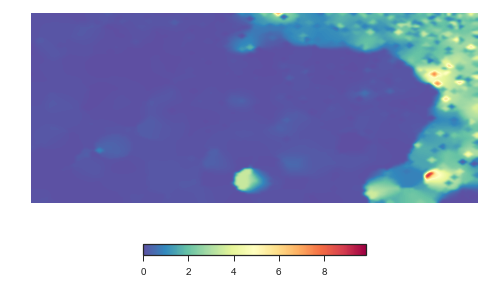

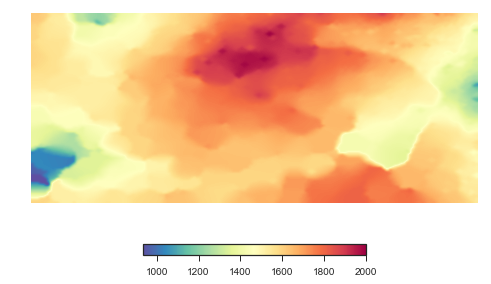

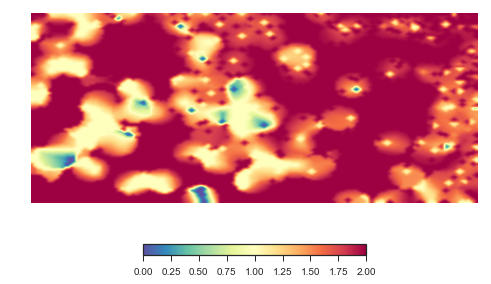

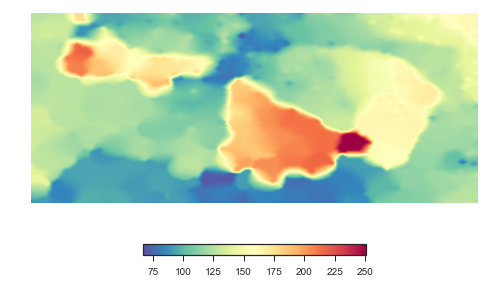

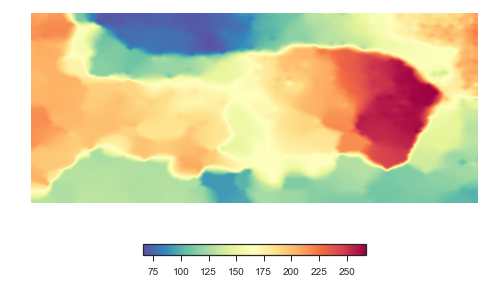

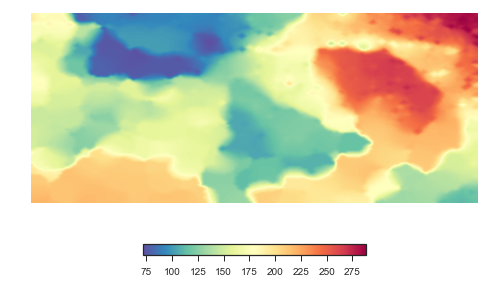

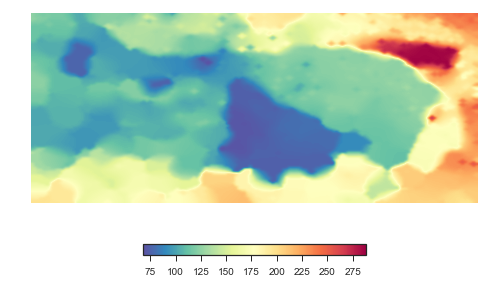

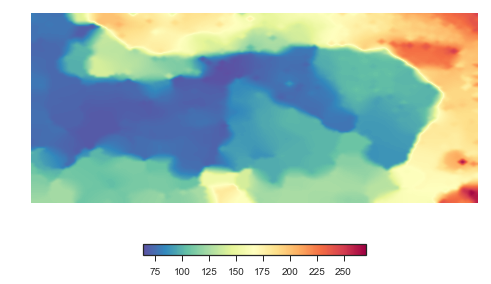

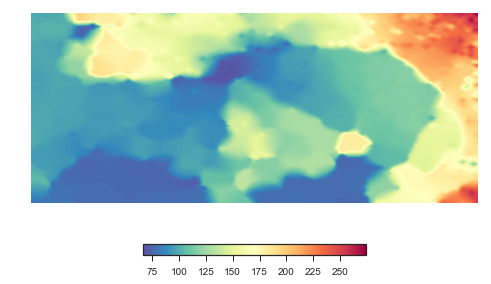

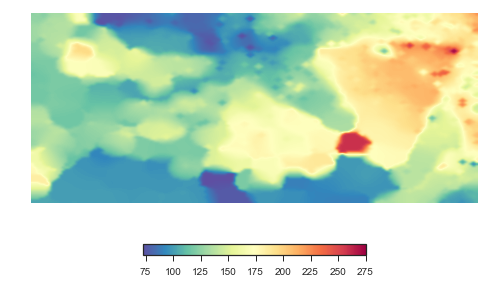

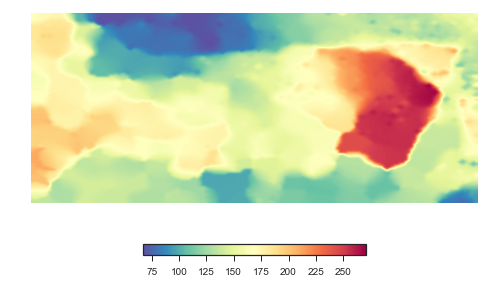

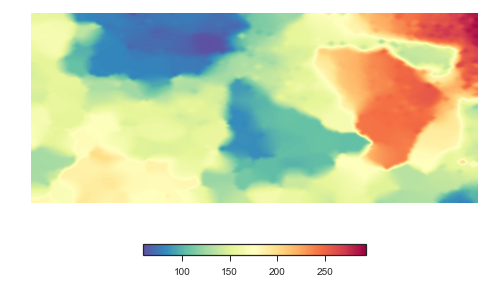

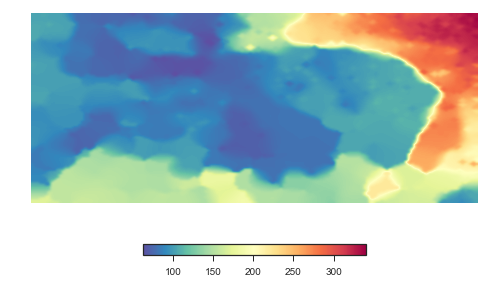

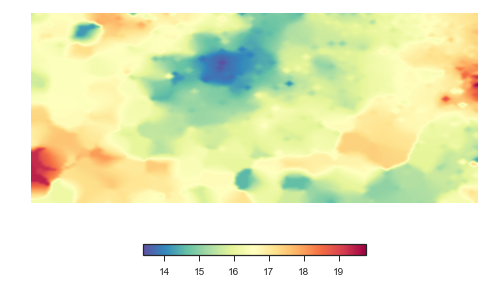

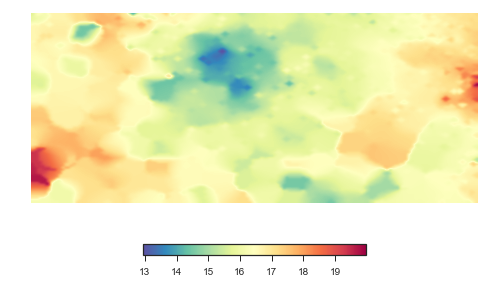

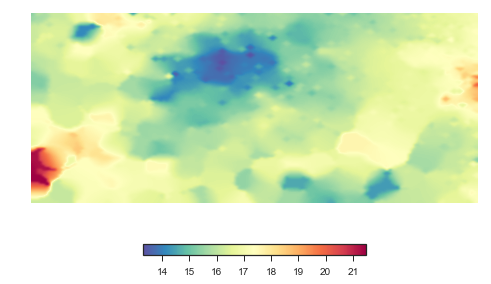

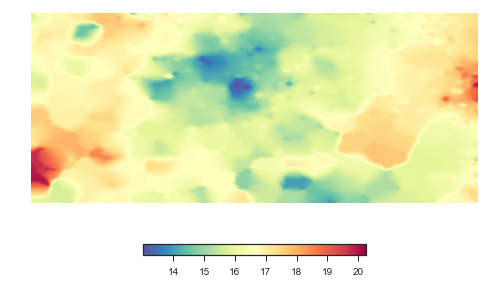

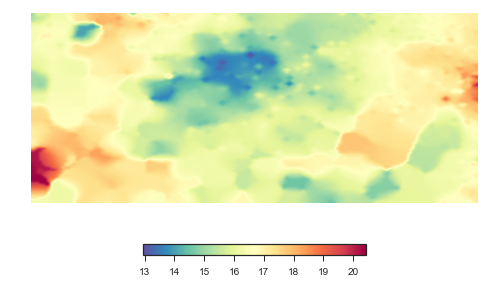

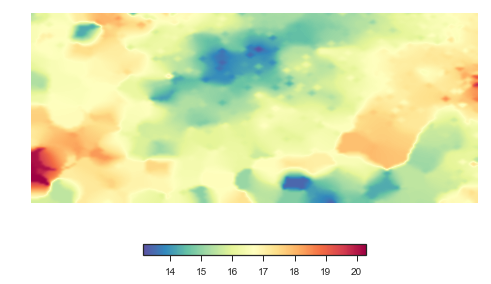

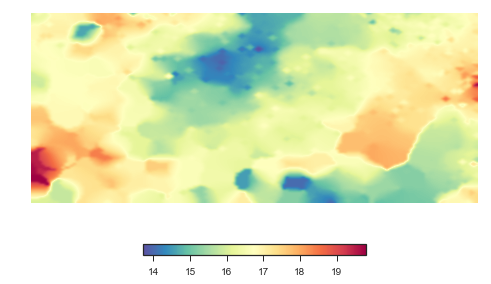

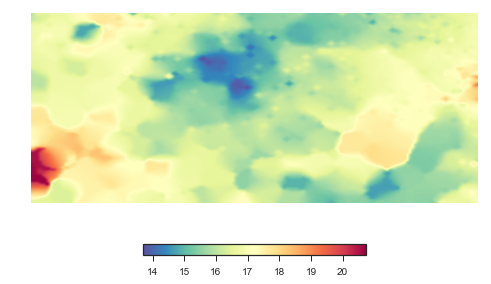

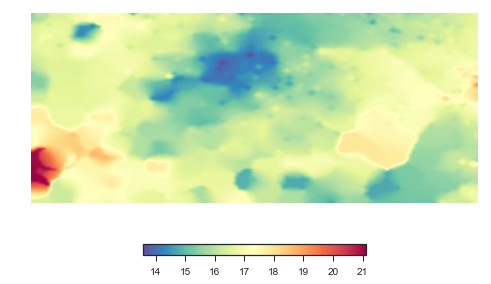

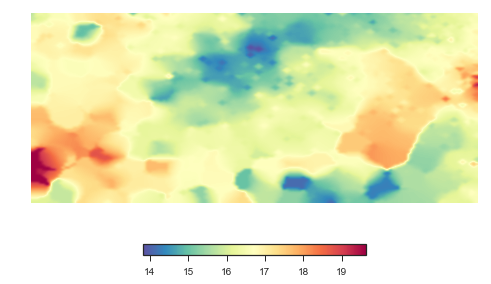

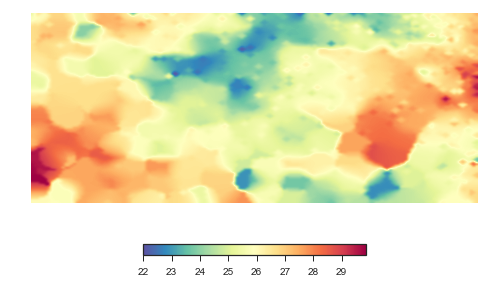

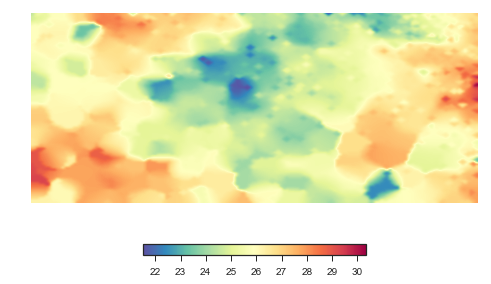

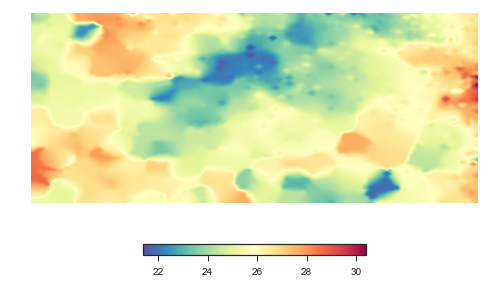

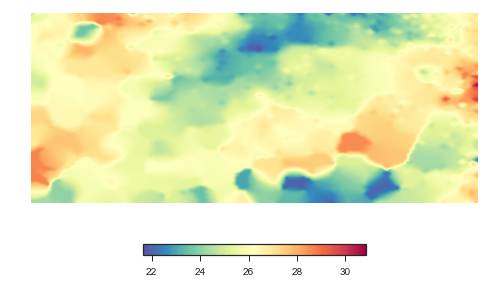

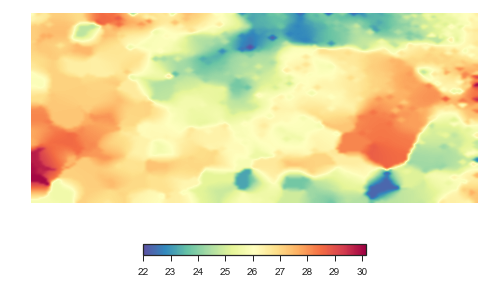

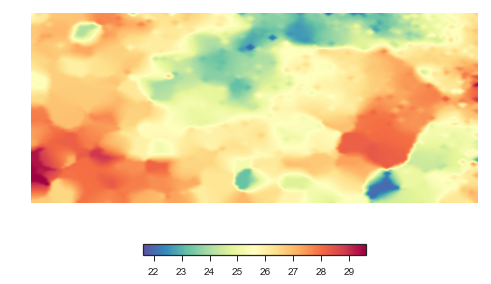

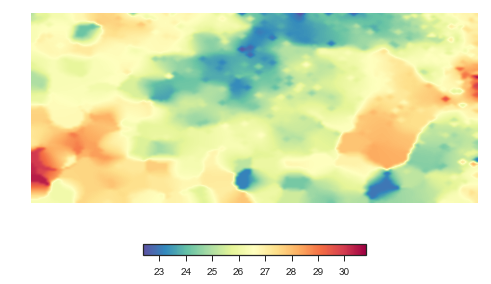

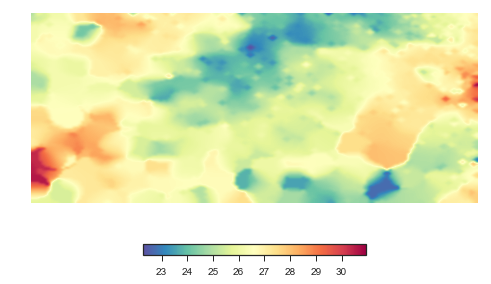

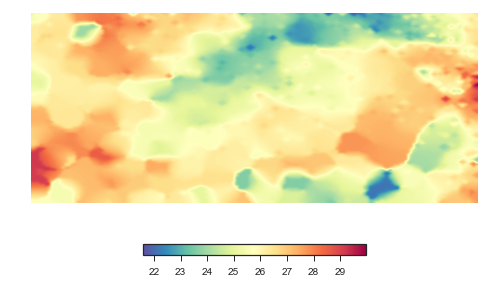

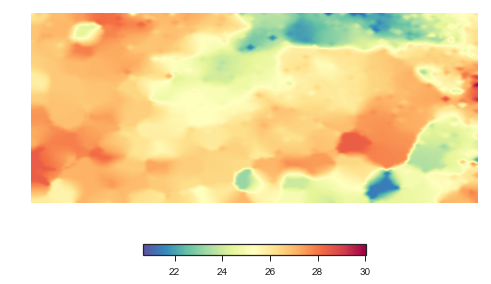

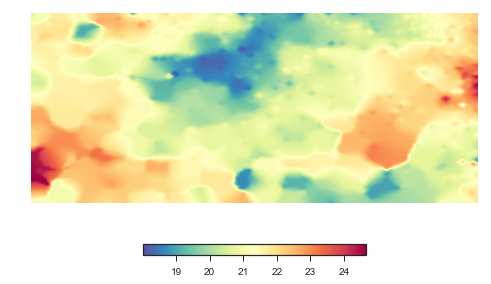

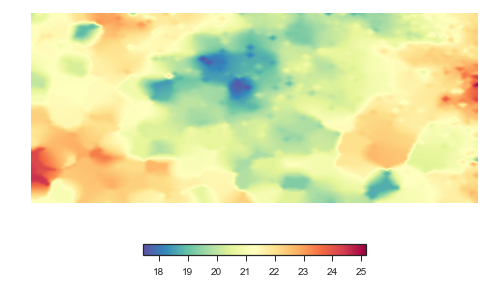

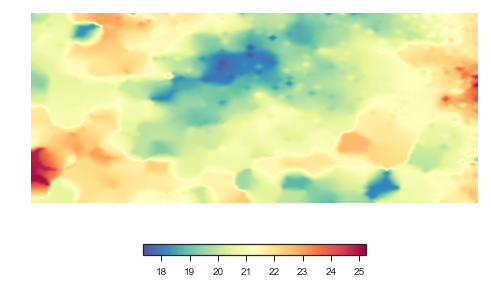

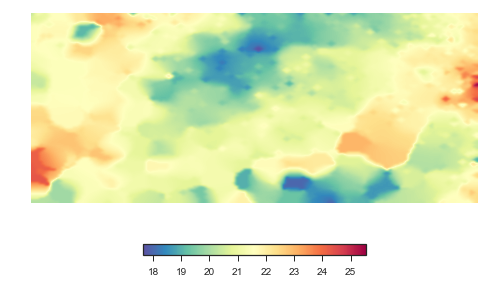

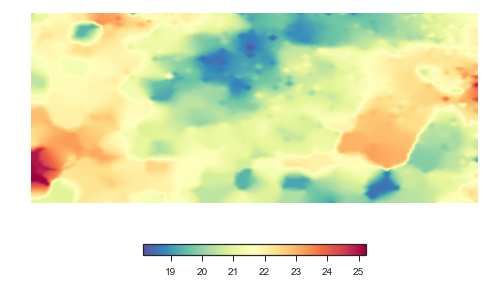

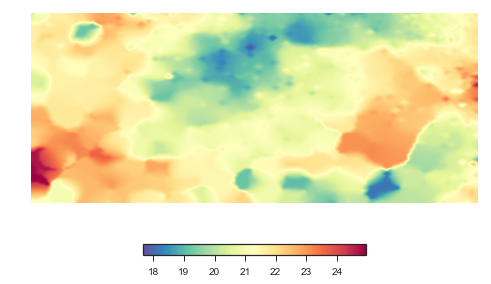

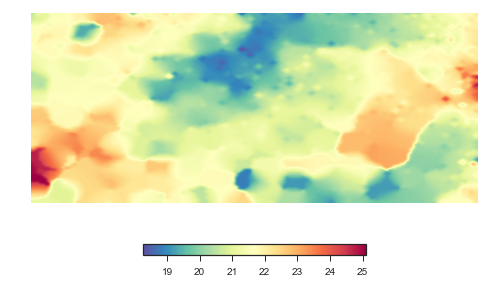

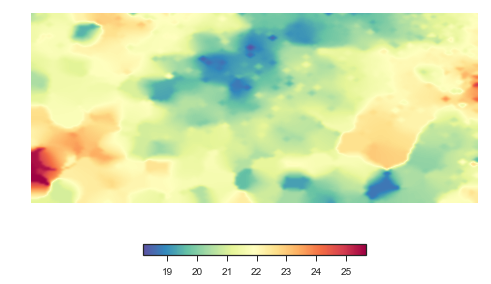

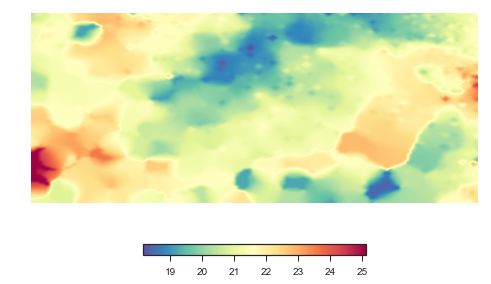

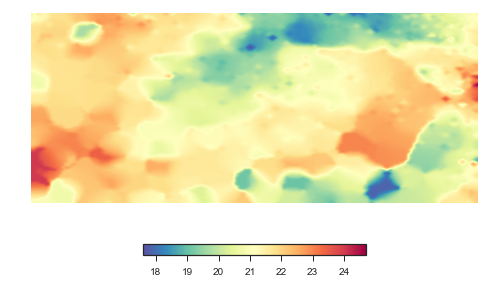

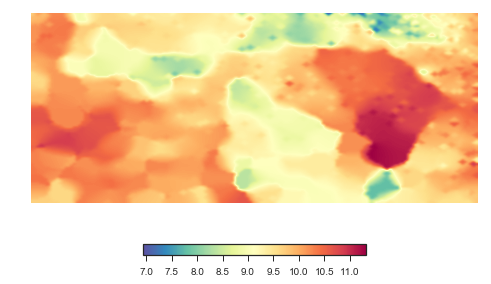

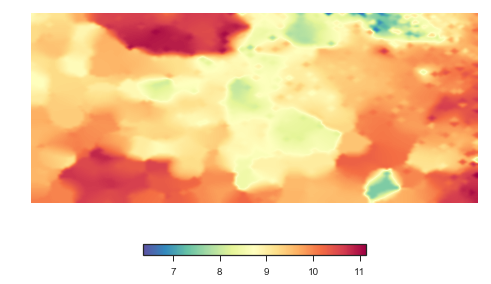

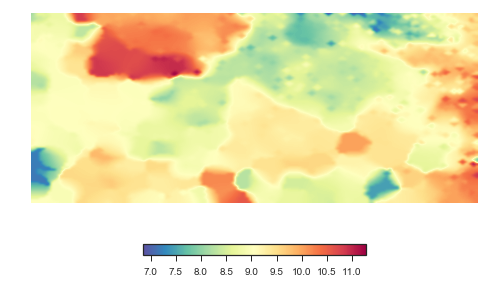

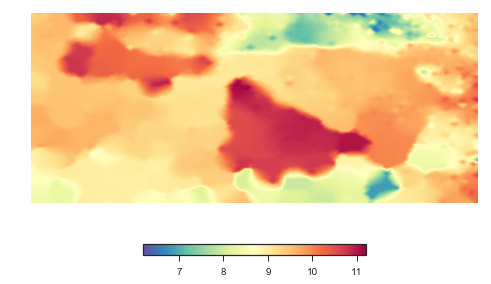

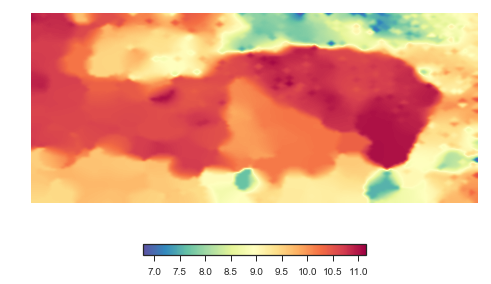

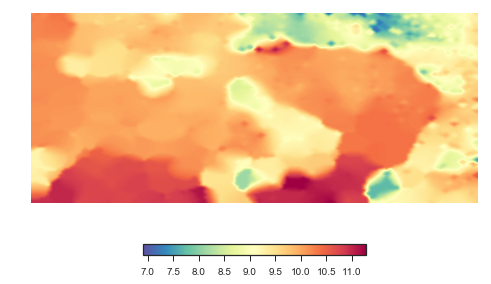

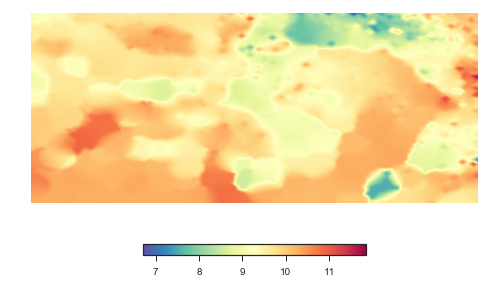

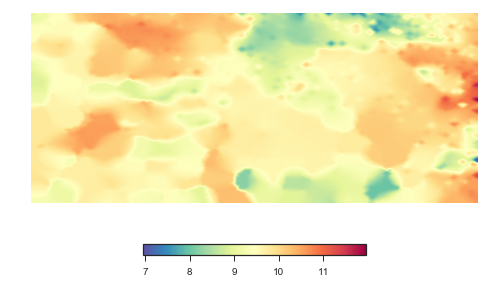

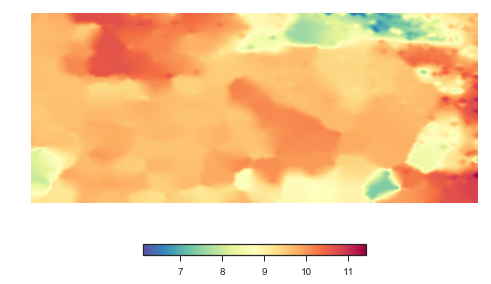

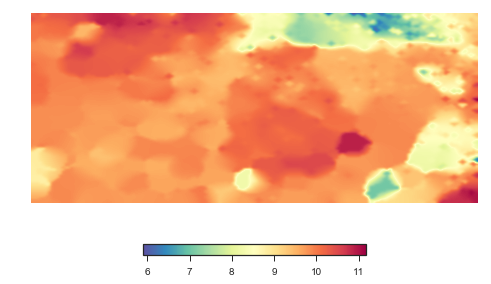

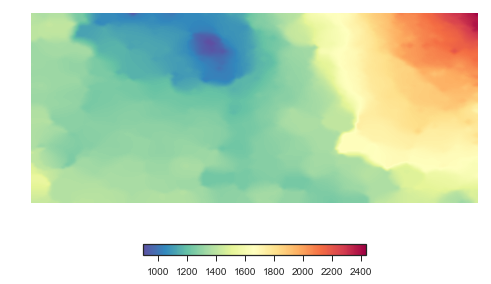

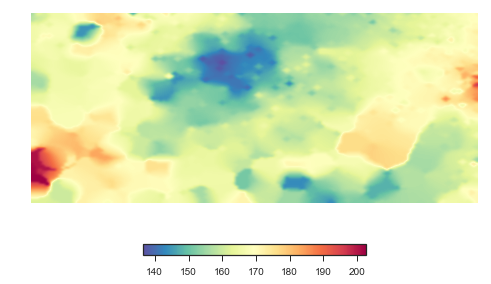

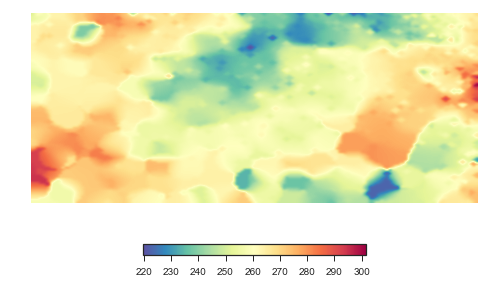

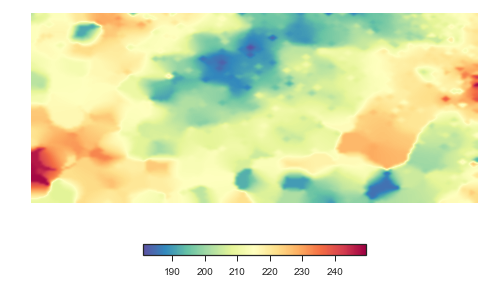

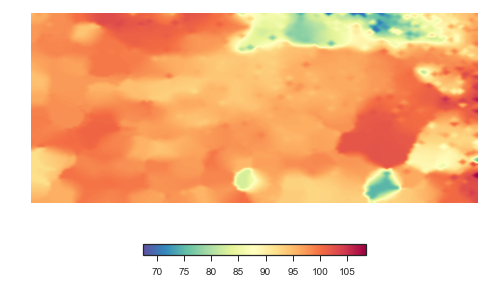

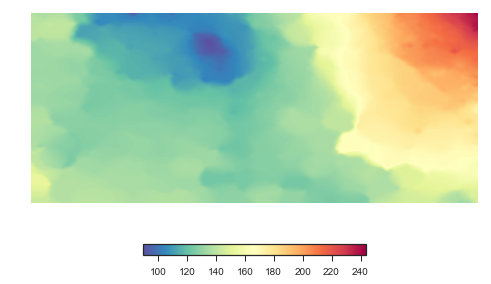

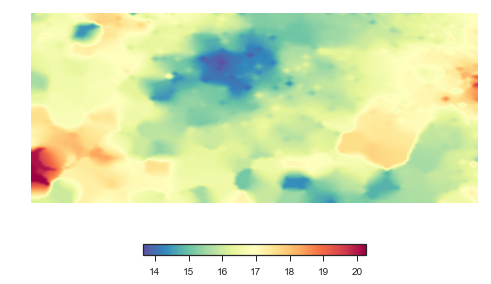

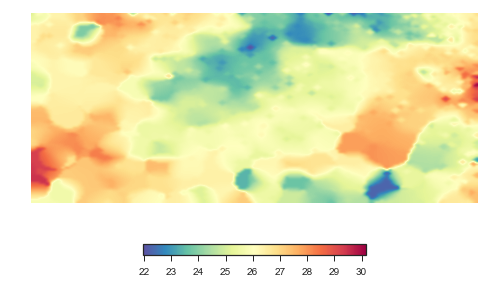

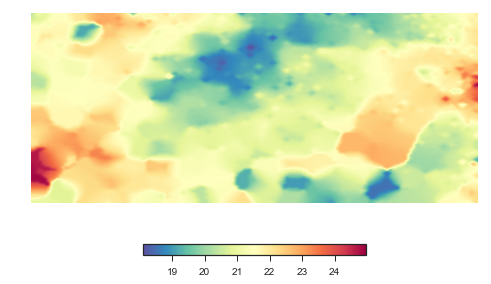

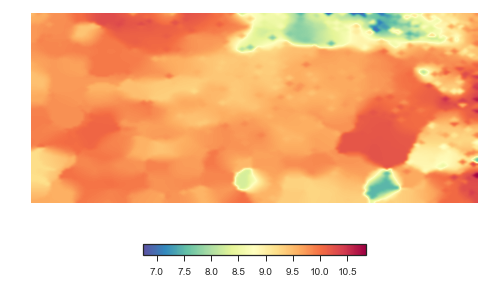

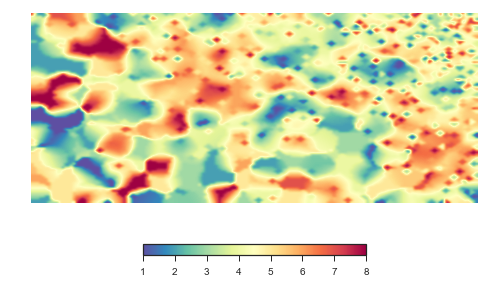

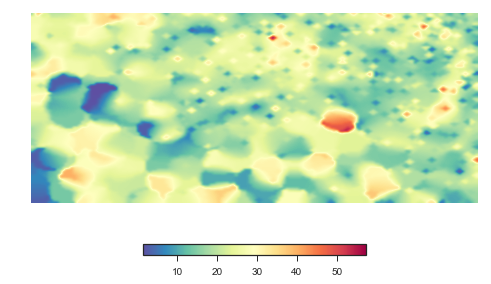

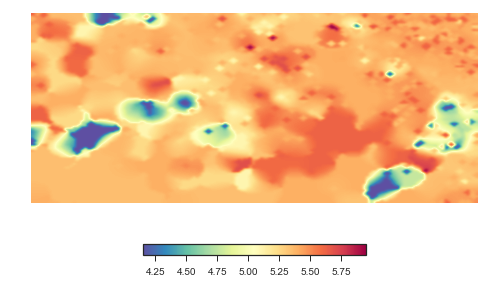

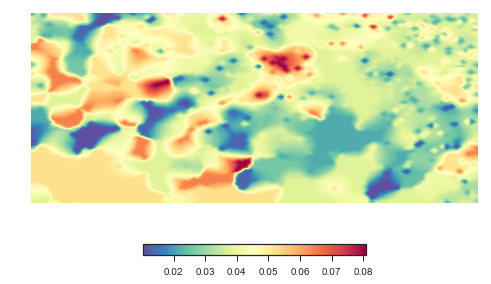

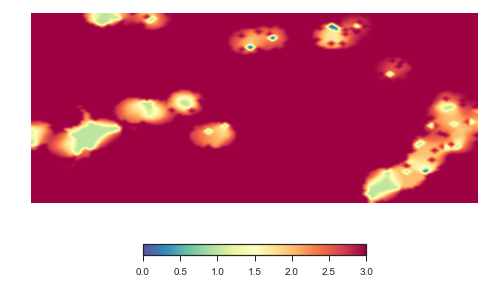

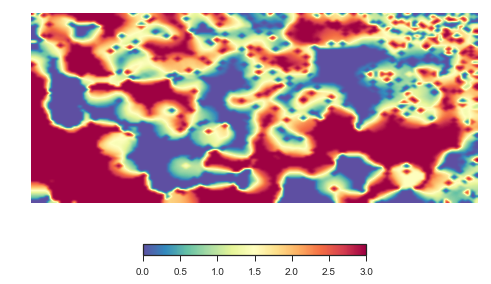

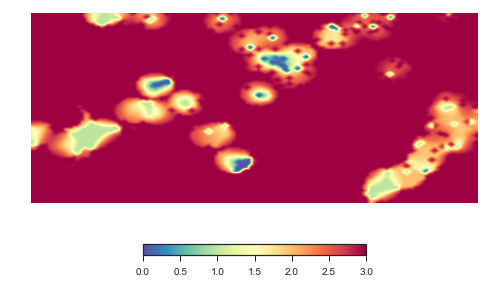

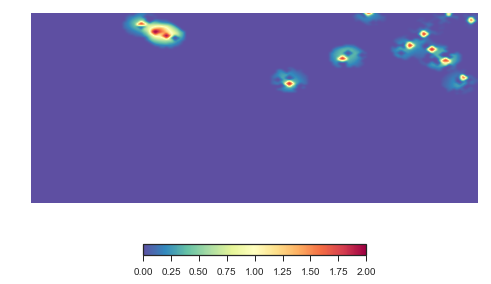

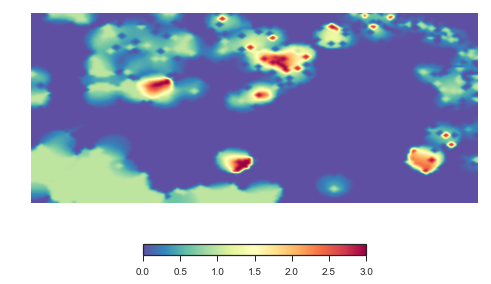

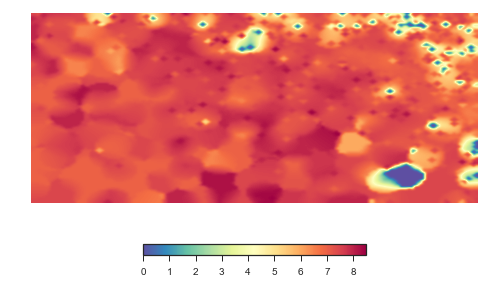

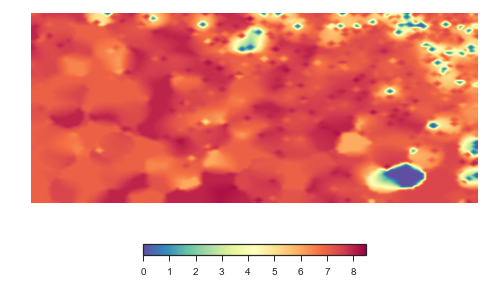

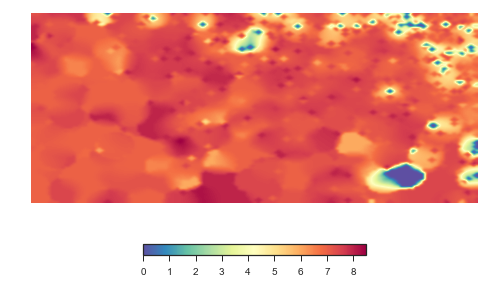

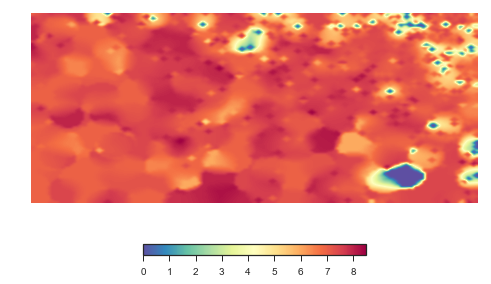

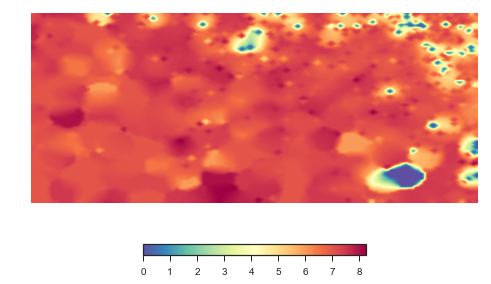

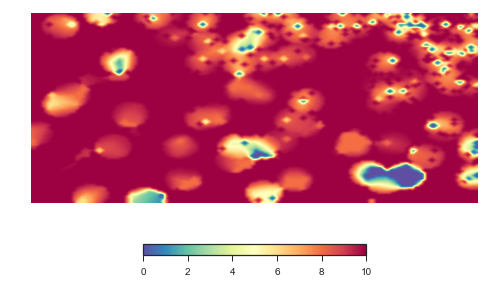

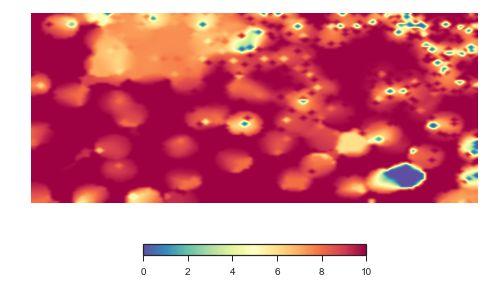

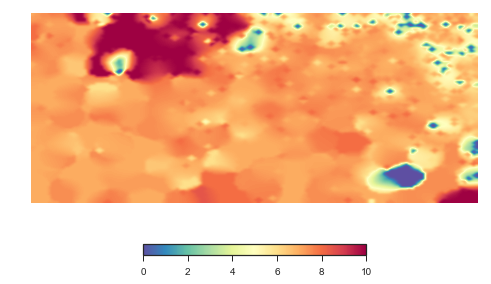

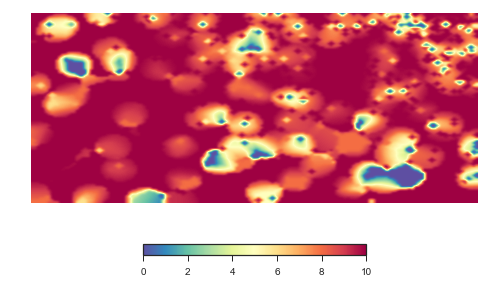

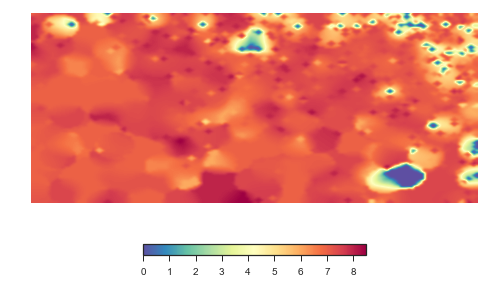

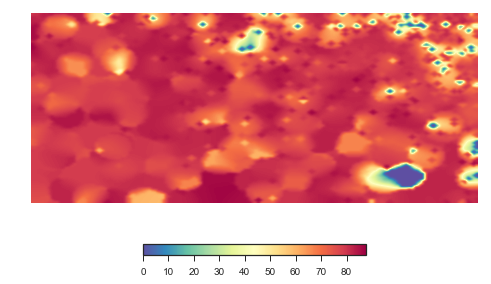

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [6]:
print df.columns

som.view_component_planes(dimensions=range(0,len(df.columns)), colorbar=True)

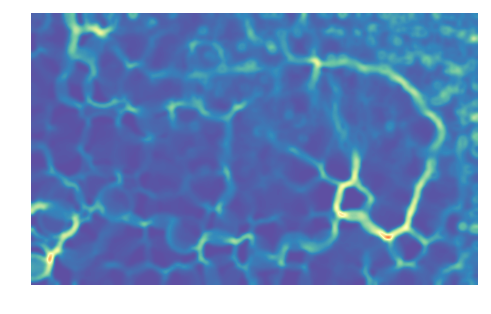

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [7]:
#som.view_similarity_matrix()
som.view_umatrix()

In [8]:
#som.view_similarity_matrix(data=df.columns)

In [9]:
cat = df2["Category"].values
colors = []
match = {'1':"black",'2':"orange",'3':"blue",'4':"red"}
for c in cat:
    colors.append(match.get(str(c)))

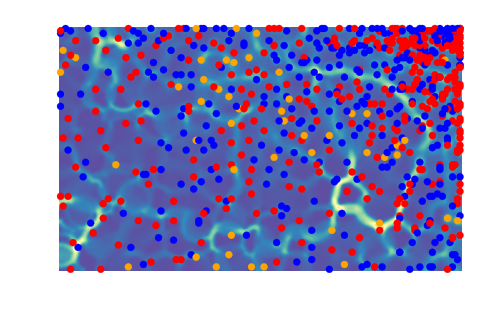

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [10]:

som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [11]:
cat = df2["year"].values
colors = []
match = {'2011':"black",'2016':"orange"}
for c in cat:
    colors.append(match.get(str(c)))

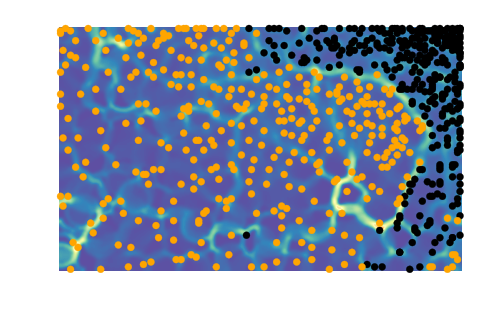

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [12]:

som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [13]:
som.get_surface_state()

array([[ 824.25606483,  833.01915368,  842.0365524 , ...,  863.60237077,
         796.25298166,  751.28028239],
       [ 791.18010453,  800.09942095,  809.27995015, ...,  833.8093898 ,
         770.84516364,  730.00426125],
       [ 718.79188381,  727.29143838,  736.08810822, ...,  757.5733434 ,
         689.50757375,  643.60880217],
       ..., 
       [ 320.99398242,  324.10719931,  328.07890593, ...,  139.1626119 ,
          59.24301525,   21.99374885],
       [ 312.96965104,  315.6707743 ,  319.26168942, ...,  119.66276539,
          39.05074813,   19.86295031],
       [ 279.2679389 ,  279.54791354,  280.86560132, ...,   65.58904196,
          95.52566868,  144.33422056]])

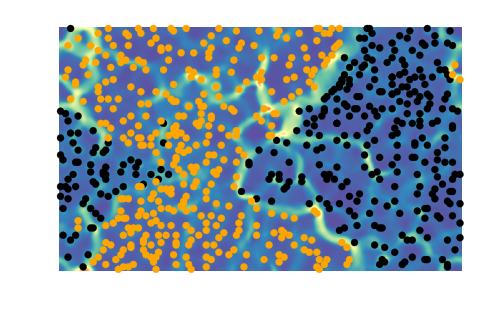

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [14]:
som = somoclu.Somoclu(n_columns, n_rows, data=df.values, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

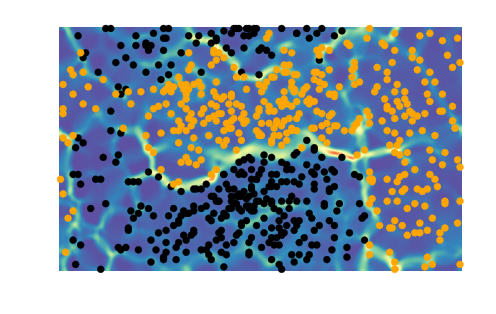

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

In [15]:
som = somoclu.Somoclu(n_columns, n_rows, data=df.values, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

In [16]:
som.view_activation_map()

Exception: Either specify a vector to see its activation or give an index of the training data instances